In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

%matplotlib inline

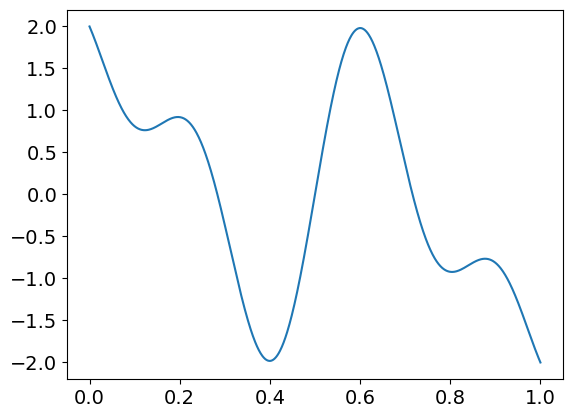

In [59]:
n = 1000
x = np.linspace(0,1, n)

f = lambda x: np.sin(2*np.pi*x) + 2*np.cos(3*np.pi*x) -np.sin(6*np.pi*x)
plt.plot(x, f(x))


### Simplified KRR implementation

In [60]:
from sklearn.metrics import pairwise_distances
def krr(xs, y,  xe, sigma = 1.0, ld = 1.0):
    # KXX
    R = pairwise_distances(xs)
    KXX = np.exp(-(R/sigma)**2.)
    alpha = np.linalg.solve( KXX + ld**2.*np.eye(xs.shape[0]), y)

    #KXY
    R = pairwise_distances(xe, xs)
    KXY = np.exp(-(R/sigma)**2.)
    return KXY @ alpha


### Generate data

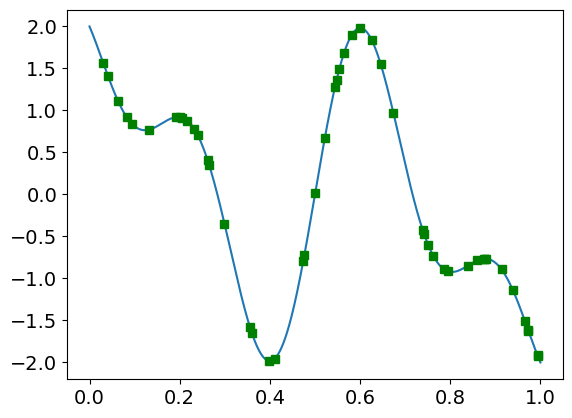

In [61]:
xs = np.sort(np.random.rand(50))
ys = f(xs) + 1.e-3*np.random.randn(xs.size)
plt.plot(x, f(x), xs, ys, 'gs')


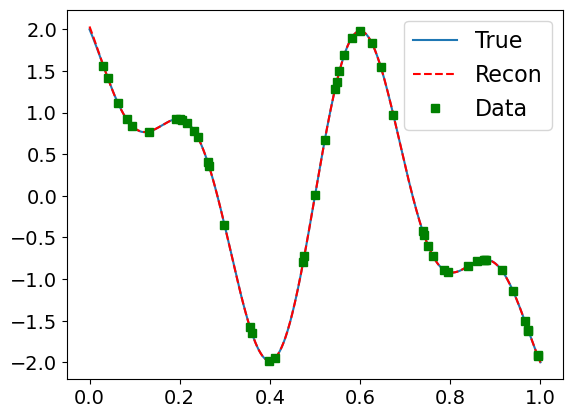

In [62]:
fe = krr(xs[:,np.newaxis], ys, x[:,np.newaxis], sigma=0.25, ld = 1.e-3)
plt.plot(x, f(x), x, fe, 'r--', xs, ys, 'gs')
plt.legend(('True', 'Recon', 'Data'), fontsize = 16)


### Effect of changing sigma

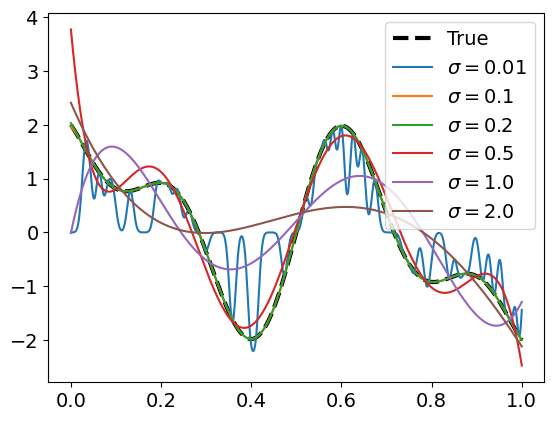

In [63]:
slst = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
plt.plot(x, f(x), 'k--', lw=3.0)
for sigma in slst:
    fe = krr(xs[:,np.newaxis], ys, x[:,np.newaxis], sigma=sigma, ld = 1.e-3)
    plt.plot(x, fe)
plt.legend(('True', '$\sigma=0.01$', '$\sigma=0.1$', '$\sigma=0.2$', '$\sigma=0.5$', '$\sigma=1.0$', '$\sigma=2.0$'), fontsize = 14)


### Effect of changing lambda

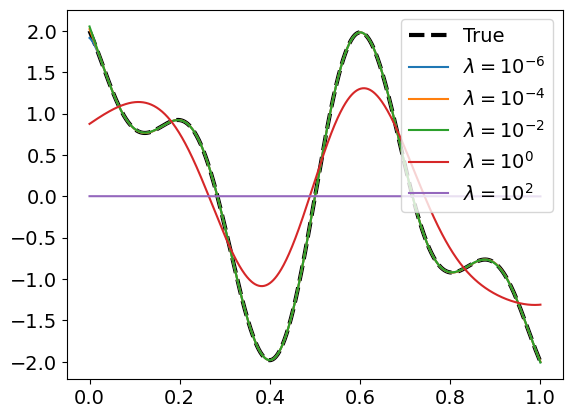

In [64]:
lst = [1.e-6, 1.e-4, 1.e-2,1.e0, 1.e2]
plt.plot(x, f(x), 'k--', lw=3.0)
for ld in lst:
    fe = krr(xs[:,np.newaxis], ys, x[:,np.newaxis], sigma=0.2, ld = ld)
    plt.plot(x, fe)
plt.legend(('True', '$\lambda=10^{-6}$', '$\lambda=10^{-4}$', '$\lambda=10^{-2}$', '$\lambda=10^{0}$', '$\lambda=10^{2}$'), fontsize = 14)

In [65]:

Fmu = lambda X, mu : 1/np.sqrt( (X[:,0] - mu[0])**2. + (X[:,1] - mu[1])**2.  + 0.1) 
F = lambda x: Fmu(x, np.array([0.,0.]))

xs = 0.1 + 0.8*np.random.rand(100,2)
ys = F(xs) + 1.e-3*np.random.randn(xs.shape[0])

x = np.linspace(0.1,0.9,50)
X,Y = np.meshgrid(x,x)
xe = np.zeros((x.size**2, 2)); xe[:,0] = X.flatten(); xe[:,1] = Y.flatten();
fe = krr(xs, ys, xe, sigma=0.25, ld = 1.e-3)

Error in interpolation 0.002743144035974238


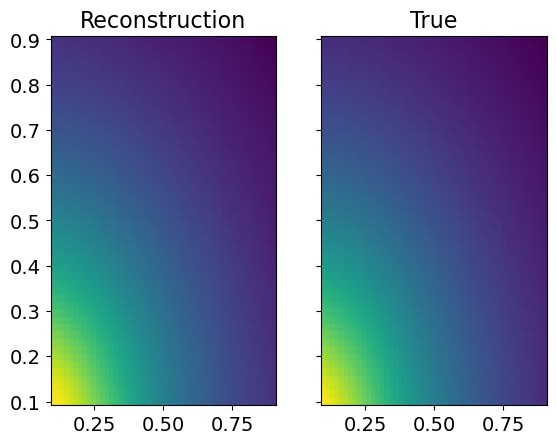

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey= True)

ax1.pcolormesh(X,Y, fe.reshape((50,50)))
ax1.set_title('Reconstruction', fontsize = 16)
ye = F(xe)
ax2.pcolormesh(X, Y, ye.reshape((50,50)))
ax2.set_title('True', fontsize=16)
print("Error in interpolation", np.linalg.norm(fe - ye)/np.linalg.norm(ye))

### Machine learning dataset

See: https://archive.ics.uci.edu/dataset/1/abalone

In [67]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) #186 
  
# data  
X = abalone.data.features.to_numpy()[:,1:]

# Standardize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = abalone.data.targets.to_numpy()

Relative error is  0.16375829647001391


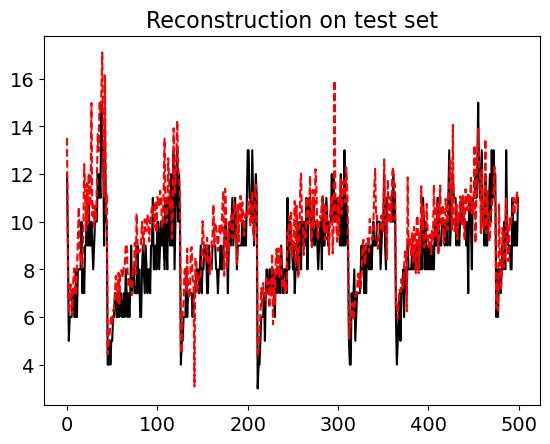

In [68]:
ntr = 2500; nts = 500
fe = krr(X[:ntr,:], y[:ntr], X[ntr:ntr+nts,:], sigma = 2.0, ld = 0.25)
ye = y[ntr:ntr+nts].flatten()

plt.plot(range(nts), ye, 'k-', range(nts), fe.flatten(), 'r--')
plt.title('Reconstruction on test set', fontsize = 16)
print("Relative error is ", np.linalg.norm(ye-fe.flatten())/np.linalg.norm(ye))